# Unsupervised Learning

# 1. K Means Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)


In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [4]:
# k meas model

#kmeans = KMeans(n_clusters=2 ,init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = KMeans(n_clusters=3 , random_state=0)
kmeans.fit(X)

c:\Users\daf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

Cluster Centers:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.901613          2.748387           4.393548   
1                 5.006000          3.428000           1.462000   
2                 6.850000          3.073684           5.742105   

         petal width (cm)  
Cluster                    
0                1.433871  
1                0.246000  
2                2.071053  


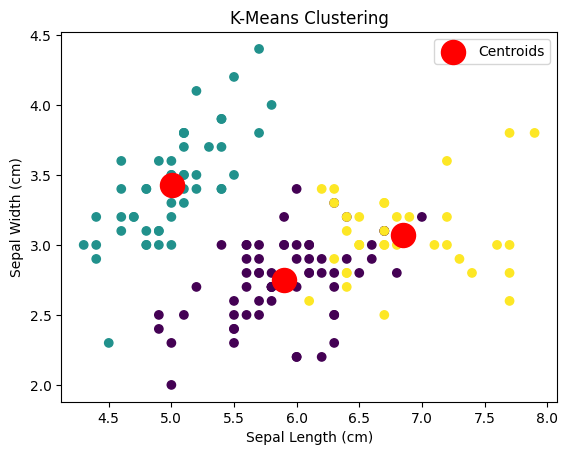

In [5]:

# Add cluster labels to the DataFrame (optional)
df['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(df.groupby('Cluster').mean())

# Visualize the clusters (for 2 features)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [6]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

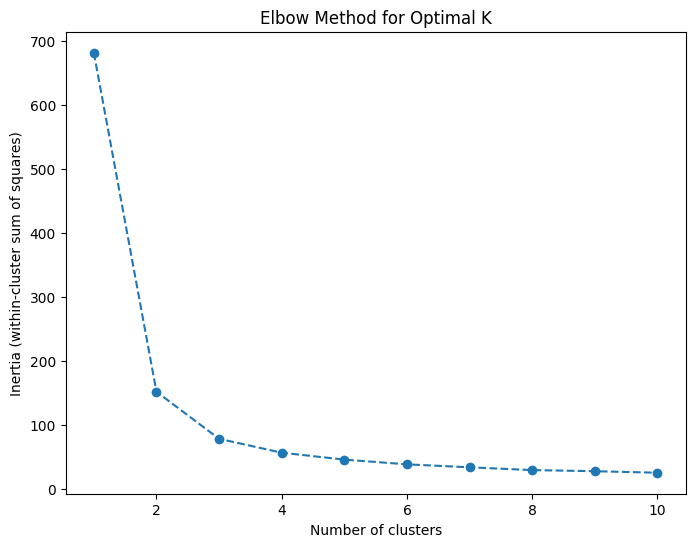

In [7]:

# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [8]:
#evaluate the model
from sklearn.metrics import silhouette_score

print("Silhouette Score: ", silhouette_score(X, kmeans.labels_))

Silhouette Score:  0.32380743093552017
